# 基底関数と正則化

## 5.2 区分的多項式とスプライン

In [1]:
%matplotlib inline
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

# Limits
x0, xi0, xi1, x1 = -1, 1.5, 4.5, 7
y0, y1 = 0, 4

# Sine line
xgrid = scipy.linspace(x0, x1, 100)
ygrid = scipy.cos(xgrid)+2

# Random sample
size_sample = 60
err_sample = scipy.randn(size_sample)*.3
x_sample = scipy.linspace(x0, x1, size_sample)
y_sample = scipy.cos(x_sample)+2+err_sample

Text(0.5,1,'Piecewise-linear Basis Function')

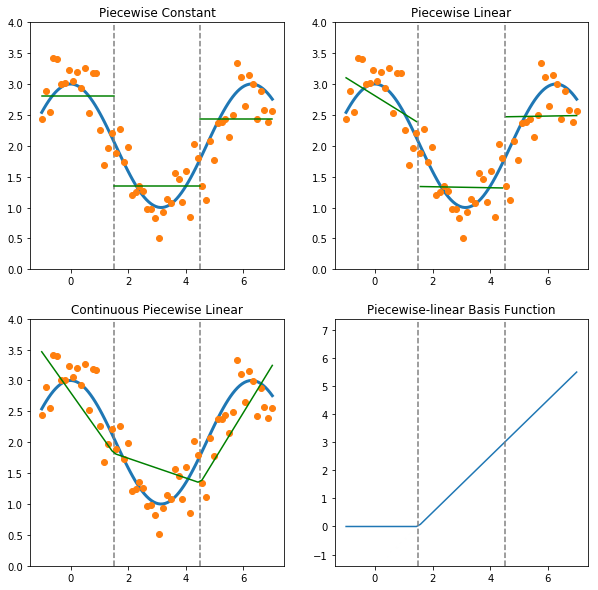

In [5]:
# A piecewise constant function fit
fig51 = plt.figure(51, figsize=(10, 10))
ax1 = fig51.add_subplot(2, 2, 1)
ax1.plot(xgrid, ygrid, linewidth=3)
ax1.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax1.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax1.set_ylim(y0, y1)
ax1.plot(x_sample, y_sample, 'o')

# Split
mask_split1 = x_sample < xi0
mask_split2 = scipy.all([x_sample >= xi0, x_sample < xi1], axis=0)
mask_split3 = xi1 <= x_sample
x_split1 = x_sample[mask_split1]
x_split2 = x_sample[mask_split2]
x_split3 = x_sample[mask_split3]
y_split1 = y_sample[mask_split1]
y_split2 = y_sample[mask_split2]
y_split3 = y_sample[mask_split3]

# Piecewise constant fit (averaging for each window)
y_split1_mean = y_split1.mean()
y_split2_mean = y_split2.mean()
y_split3_mean = y_split3.mean()
ax1.plot([x0, xi0], [y_split1_mean, y_split1_mean], color='g')
ax1.plot([xi0, xi1], [y_split2_mean, y_split2_mean], color='g')
ax1.plot([xi1, x1], [y_split3_mean, y_split3_mean], color='g')
ax1.set_title('Piecewise Constant')

# A piecewise linear fit (the top right)
y_split1_centered = y_split1-y_split1_mean
y_split2_centered = y_split2-y_split2_mean
y_split3_centered = y_split3-y_split3_mean

beta_split1 = y_split1_centered.dot(x_split1)/(x_split1*x_split1).sum()
beta_split2 = y_split2_centered.dot(x_split2)/(x_split2*x_split2).sum()
beta_split3 = y_split3_centered.dot(x_split3)/(x_split3*x_split3).sum()

y_split1_hat = beta_split1*x_split1+y_split1_mean
y_split2_hat = beta_split2*x_split2+y_split2_mean
y_split3_hat = beta_split3*x_split3+y_split3_mean

ax2 = fig51.add_subplot(2, 2, 2)
ax2.plot(xgrid, ygrid, linewidth=3)
ax2.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax2.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax2.set_ylim(y0, y1)
ax2.plot(x_sample, y_sample, 'o')

ax2.plot(x_split1, y_split1_hat, color='g')
ax2.plot(x_split2, y_split2_hat, color='g')
ax2.plot(x_split3, y_split3_hat, color='g')
ax2.set_title('Piecewise Linear')

# A continuous piecewise linear fit (the bottom left)
# Construct H
h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = scipy.where(x_sample < xi0, 0, x_sample-xi0)
h4 = scipy.where(x_sample < xi1, 0, x_sample-xi1)
H = scipy.vstack((h1, h2, h3, h4)).T

# OLS
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat = H @ beta

ax3 = fig51.add_subplot(2, 2, 3)
ax3.plot(xgrid, ygrid, linewidth=3)
ax3.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax3.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax3.set_ylim(y0, y1)
ax3.plot(x_sample, y_sample, 'o')
ax3.plot(x_sample, y_hat, color='g')
ax3.set_title('Continuous Piecewise Linear')

ax4 = fig51.add_subplot(2, 2, 4)
ax4.plot(x_sample, h3)
ax4.plot([xi0, xi0], ax4.get_xlim(), '--', color='gray')
ax4.plot([xi1, xi1], ax4.get_xlim(), '--', color='gray')
ax4.set_ylim(ax4.get_xlim())
ax4.set_title('Piecewise-linear Basis Function')

### 5.2.1 3次自然スプライン 